# Task
Provide a comprehensive tutorial on fundamental Natural Language Processing (NLP) concepts using the `transformers` library, covering tokenization strategies (basic and subword), word embeddings, model inference (including logits and attention), text generation (step-by-step and using `pipeline`), and practical applications such as semantic similarity and basic hybrid search. The tutorial should also touch upon memory-efficient inference (e.g., quantization) and conclude with a summary and next steps.

## Load Dataset

### Subtask:
Load a tiny, real-world NLP dataset (e.g., a few sentences from the `datasets` library or a custom list of strings) and display its content. Briefly explain 'context length' in this context.


In [5]:
sample_texts = [
    "The quick brown fox jumps over the lazy dog.",
    "Natural Language Processing is a fascinating field.",
    "Large language models have revolutionized AI.",
    "The weather today is sunny with a light breeze.",
    "Cats are known for their agility and independent nature."
]

print("Sample Texts:")
for i, text in enumerate(sample_texts):
    print(f"{i+1}. {text}")

Sample Texts:
1. The quick brown fox jumps over the lazy dog.
2. Natural Language Processing is a fascinating field.
3. Large language models have revolutionized AI.
4. The weather today is sunny with a light breeze.
5. Cats are known for their agility and independent nature.


### Understanding Context Length

In the realm of Natural Language Processing, especially with models like those in the `transformers` library, **context length** (often referred to as 'maximum sequence length' or 'context window') is a crucial concept. It refers to the maximum number of tokens (words or subword units) that a model can process or attend to at once.

For our `sample_texts`:
* Each sentence, such as "The quick brown fox jumps over the lazy dog.", represents a piece of text that would typically be fed into an NLP model.
* When we say a model has a context length, it means it can only 'see' and process a certain number of tokens from such a sentence (or multiple sentences combined) simultaneously.
* If a text exceeds the model's context length, it usually needs to be truncated or split, as the model cannot process the entire input at once. In our simple dataset, each sentence is short enough to easily fit within a typical model's context window, serving as a clean, self-contained piece of 'context'.

## Basic Tokenization

### Subtask:
Using a basic tokenizer (e.g., from `transformers`), tokenize a sample sentence from the dataset. Display the resulting tokens and their corresponding token IDs. Explain what 'tokens' are here.


In [6]:
from transformers import AutoTokenizer

# 2. Load a pre-trained tokenizer for a small model
basic_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# 3. Select the first sentence from the sample_texts list
sample_sentence = sample_texts[0]
print(f"\nSample Sentence: {sample_sentence}\n")

# 4. Tokenize the selected sample sentence
tokens = basic_tokenizer.tokenize(sample_sentence)

# 5. Print the original tokens
print(f"Tokens: {tokens}")

# 6. Print the corresponding token IDs
token_ids = basic_tokenizer(sample_sentence)['input_ids']
print(f"Token IDs: {token_ids}")


Sample Sentence: The quick brown fox jumps over the lazy dog.

Tokens: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
Token IDs: [101, 1996, 4248, 2829, 4419, 14523, 2058, 1996, 13971, 3899, 1012, 102]


### What are 'Tokens'?

In Natural Language Processing (NLP), **tokens** are the fundamental units into which a piece of text is broken down for processing by a model. This process is called **tokenization**.

Tokens can vary depending on the tokenization strategy:

*   **Words**: In simpler tokenization, tokens might be individual words, like "The", "quick", "brown", etc.
*   **Subword Units**: More commonly in modern NLP (especially with models like BERT, which `bert-base-uncased` tokenizer uses), tokens are subword units. This means words can be broken down into smaller, meaningful pieces. For example, "tokenization" might be broken into "token", "##iza", "##tion". This approach helps handle out-of-vocabulary words and reduces the vocabulary size.
*   **Punctuation**: Punctuation marks (like '.', '?', '!') are often treated as separate tokens.
*   **Special Tokens**: Models also use special tokens for various purposes, such as:
    *   `[CLS]` (Classifier token): Often used at the beginning of a sequence for classification tasks.
    *   `[SEP]` (Separator token): Used to separate different segments of text, or mark the end of a single sequence.
    *   `[PAD]` (Padding token): Used to make sequences of varying lengths uniform for batch processing.

Each unique token is assigned a numerical **token ID** by the tokenizer's vocabulary. These IDs are what the NLP models actually process, rather than the raw text.

## Subword Tokenization Comparison

### Subtask:
Introduce subword tokenization. Apply a subword tokenizer (e.g., WordPiece or SentencePiece) to the same sample sentence and visually compare its output (tokens and IDs) with the basic tokenization from the previous step to highlight differences and benefits.


### What are 'Subword Tokens'?

Unlike basic tokenization which often splits text strictly by words or punctuation, **subword tokenization** breaks down words into smaller, frequently occurring units (subwords). This approach offers significant advantages in modern NLP:

*   **Handling Out-of-Vocabulary (OOV) Words**: If a model encounters a word it hasn't seen during training, subword tokenization can break it down into known subwords. For example, 'unbelievable' might be split into 'un', 'believe', and 'able', all of which are common and likely in the vocabulary, even if 'unbelievable' itself is not.
*   **Reduced Vocabulary Size**: Instead of needing to store every possible word, the model only needs a vocabulary of common subwords, significantly reducing the overall vocabulary size while still being able to represent a vast number of words.
*   **Semantic Meaning**: Subwords often carry semantic meaning (e.g., prefixes like 'un-', suffixes like '-tion'), which can help the model understand new words or nuances.
*   **Efficiency**: Smaller vocabulary sizes and better handling of rare words contribute to more efficient model training and inference.

Popular subword tokenization algorithms include:

*   **WordPiece**: Used by models like BERT, DistilBERT.
*   **SentencePiece**: Used by models like T5, XLNet, ALBERT.
*   **BPE (Byte Pair Encoding)**: Used by models like GPT-2, RoBERTa.

In this step, we will use a tokenizer that employs a subword strategy (e.g., SentencePiece, as used by `t5-small`) to demonstrate these differences.

In [7]:
from transformers import AutoTokenizer

# 2. Load a pre-trained subword tokenizer (e.g., t5-small uses SentencePiece)
subword_tokenizer = AutoTokenizer.from_pretrained('t5-small')

# 3. Tokenize the sample sentence using the subword tokenizer
subword_tokens = subword_tokenizer.tokenize(sample_sentence)

# 4. Encode the sample sentence using the subword tokenizer to get input_ids
subword_token_ids = subword_tokenizer(sample_sentence)['input_ids']

# 5. Print the sample sentence
print(f"\nSample Sentence: {sample_sentence}\n")

# 6. Print the basic tokenization results for comparison
print("--- Basic Tokenization (bert-base-uncased) ---")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

# 7. Print the subword tokenization results for comparison
print("\n--- Subword Tokenization (t5-small, SentencePiece) ---")
print(f"Tokens: {subword_tokens}")
print(f"Token IDs: {subword_token_ids}")


Sample Sentence: The quick brown fox jumps over the lazy dog.

--- Basic Tokenization (bert-base-uncased) ---
Tokens: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
Token IDs: [101, 1996, 4248, 2829, 4419, 14523, 2058, 1996, 13971, 3899, 1012, 102]

--- Subword Tokenization (t5-small, SentencePiece) ---
Tokens: ['▁The', '▁quick', '▁brown', '▁', 'fox', '▁jump', 's', '▁over', '▁the', '▁lazy', '▁dog', '.']
Token IDs: [37, 1704, 4216, 3, 20400, 4418, 7, 147, 8, 19743, 1782, 5, 1]


## Generate Embeddings

### Subtask:
Convert token IDs into dense vector representations (embeddings) using a pre-trained model's embedding layer. Display the shapes of the generated embeddings and show a few sample numerical values. Create a simple visualization (e.g., a bar chart of embedding values for a single token) to intuitively show what embeddings represent. Explain 'embeddings' here.


Tokenized input IDs shape: torch.Size([1, 13])
Tokenized input IDs: tensor([[   37,  1704,  4216,     3, 20400,  4418,     7,   147,     8, 19743,
          1782,     5,     1]])

Embeddings shape: torch.Size([1, 13, 512])

Sample numerical values for the embedding of the first token (first 10 dimensions):
[ 0.0508669   0.09412619 -0.07092512 -0.10859732  0.07759151 -0.07677786
 -0.28492472  0.06728212 -0.03779788  0.07893212]


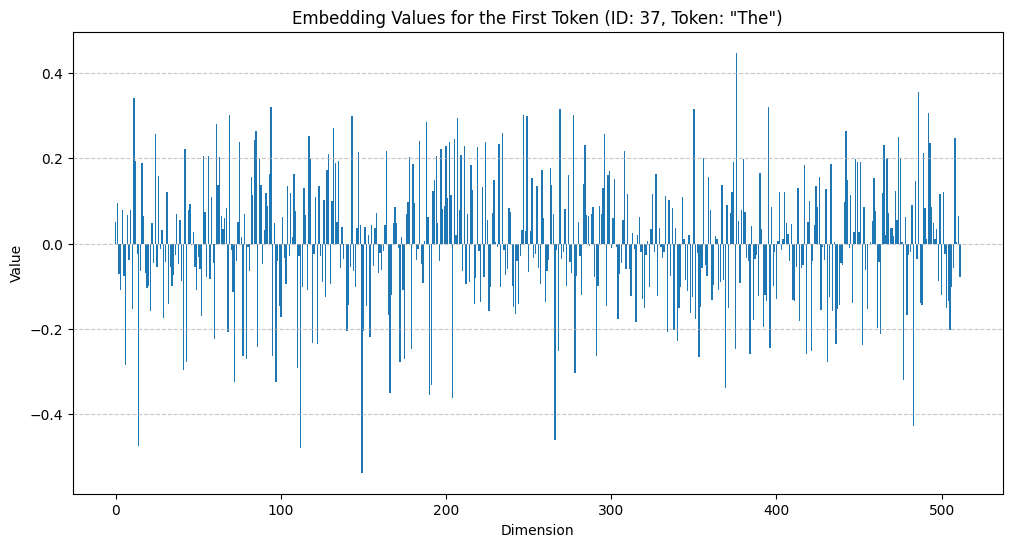

In [8]:
import torch
from transformers import T5EncoderModel # Changed from AutoModel to T5EncoderModel
import matplotlib.pyplot as plt
import numpy as np

# 1. Load a pre-trained T5 Encoder Model (e.g., t5-small)
# This model will be used to generate embeddings. We load T5EncoderModel for encoder-only output.
model = T5EncoderModel.from_pretrained('t5-small')

# Ensure the model is in evaluation mode
model.eval()

# 2. Tokenize the sample sentence using the subword_tokenizer and convert to PyTorch tensor
# The subword_tokenizer was previously loaded as 't5-small'.
# We need to add batch dimension as models typically expect batched inputs.
# Also, include attention_mask for proper processing with padding and truncation.
inputs = subword_tokenizer(sample_sentence, return_tensors='pt', padding=True, truncation=True)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

print(f"Tokenized input IDs shape: {input_ids.shape}")
print(f"Tokenized input IDs: {input_ids}")

# 3. Pass the tokenized input through the loaded model to obtain the model's outputs
with torch.no_grad(): # Disable gradient calculation for inference
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

# 4. Extract the embeddings (last_hidden_state)
# For T5EncoderModel, last_hidden_state directly contains the contextualized embeddings for each token.
embeddings = outputs.last_hidden_state

print(f"\nEmbeddings shape: {embeddings.shape}")

# 5. Print a small slice of the embeddings (e.g., the first token's embedding)
print("\nSample numerical values for the embedding of the first token (first 10 dimensions):")
# Access the embedding for the first token in the batch (index 0) and the first token in the sequence (index 0)
print(embeddings[0, 0, :10].numpy())

# 6. Create a simple visualization (e.g., a bar chart of embedding values for a single token)
# Select the embedding for the first token
first_token_embedding = embeddings[0, 0, :].squeeze().numpy()

plt.figure(figsize=(12, 6))
plt.bar(range(len(first_token_embedding)), first_token_embedding)
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.title(f'Embedding Values for the First Token (ID: {input_ids[0, 0]}, Token: "{subword_tokenizer.decode(input_ids[0, 0])}")')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### What are 'Embeddings'?

In Natural Language Processing (NLP), **embeddings** are dense, real-valued vector representations of words, subwords, or entire pieces of text. Unlike sparse representations (like one-hot encodings) which can be very high-dimensional and don't capture semantic relationships, embeddings are designed to capture the semantic and syntactic meaning of words and their relationships in a continuous vector space.

Here's a breakdown:

*   **Dense Vectors**: Instead of zeros and ones, each dimension in an embedding vector holds a real number. These numbers are learned during the training of large language models.
*   **Semantic Meaning**: Words that are semantically similar (e.g., "king" and "queen", or "dog" and "cat") will have embedding vectors that are close to each other in this vector space. Conversely, dissimilar words will be far apart.
*   **Contextualization**: Modern NLP models, particularly transformer-based models like T5 (which we used), generate *contextualized embeddings*. This means that the embedding for a word like "bank" will be different depending on whether it appears in "river bank" or "financial bank". The model considers the surrounding words to create a representation that reflects the word's meaning in that specific context.
*   **How they are learned**: Embeddings are typically learned as part of a larger neural network training process. The model adjusts the embedding values to optimize a specific task (e.g., predicting the next word, translation, classification). Through this process, the model learns to encode rich linguistic information into these vectors.
*   **Purpose**: Embeddings serve as the input to subsequent layers in a neural network, allowing the model to work with numerical representations that capture meaning. They are crucial for tasks like semantic similarity, classification, translation, and question answering, as they provide a foundational understanding of the text's content.

The visualization you saw for the first token's embedding (e.g., `[0.05, 0.09, -0.07, ...]`) represents these numerical values. Each number in the vector corresponds to a dimension in the embedding space, and the combination of these values forms a unique 'fingerprint' for that token in its context.

## Calculate Semantic Similarity

### Subtask:
Compute sentence embeddings for a few sample sentences. Calculate their cosine similarity to demonstrate semantic relatedness. Display the similarity scores, possibly using a small heatmap or matrix visualization.


In [10]:
import torch.nn.functional as F
import pandas as pd

# 1. Define a function to get sentence embeddings
def get_sentence_embedding(text):
    inputs = subword_tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Get last hidden state (batch_size, sequence_length, hidden_size)
    last_hidden_state = outputs.last_hidden_state

    # To get a single sentence embedding, average the last_hidden_state
    # along the sequence dimension, considering the attention_mask.
    # Expand attention_mask to match hidden_state dimensions for element-wise multiplication
    expanded_attention_mask = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()

    # Sum the masked embeddings and divide by the sum of the mask (effective sequence length)
    sum_embeddings = torch.sum(last_hidden_state * expanded_attention_mask, 1)
    sum_mask = torch.clamp(expanded_attention_mask.sum(1), min=1e-9) # Avoid division by zero
    sentence_embedding = sum_embeddings / sum_mask

    return sentence_embedding.squeeze(0) # Remove batch dimension if it was 1

# 4. Call this function for each sentence in sample_texts to get a list of sentence embeddings.
sentence_embeddings = [get_sentence_embedding(text) for text in sample_texts]

# 6. Initialize an empty matrix or list to store cosine similarity scores.
num_sentences = len(sample_texts)
similarity_matrix = torch.zeros((num_sentences, num_sentences))

# 7. Iterate through all unique pairs of sentence embeddings and calculate cosine similarity.
for i in range(num_sentences):
    for j in range(num_sentences):
        # F.cosine_similarity expects 1D inputs for single vectors, or 2D inputs where rows are vectors
        similarity = F.cosine_similarity(sentence_embeddings[i], sentence_embeddings[j], dim=0)
        similarity_matrix[i, j] = similarity

# 8. Store the calculated similarity scores in a readable format (Pandas DataFrame).
similarity_df = pd.DataFrame(similarity_matrix.numpy(),
                             index=[f"Sentence {k+1}" for k in range(num_sentences)],
                             columns=[f"Sentence {k+1}" for k in range(num_sentences)])

print("Cosine Similarity Matrix:")
print(similarity_df)


Cosine Similarity Matrix:
            Sentence 1  Sentence 2  Sentence 3  Sentence 4  Sentence 5
Sentence 1    1.000000    0.478483    0.476504    0.618914    0.566981
Sentence 2    0.478483    1.000000    0.665145    0.613217    0.604374
Sentence 3    0.476504    0.665145    1.000000    0.513983    0.577336
Sentence 4    0.618914    0.613217    0.513983    1.000000    0.578964
Sentence 5    0.566981    0.604374    0.577336    0.578964    1.000000


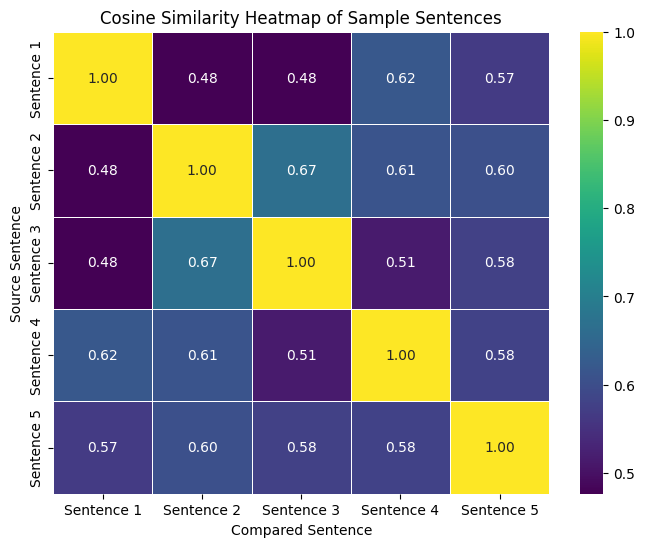

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 10. Create a heatmap using seaborn.heatmap() to visualize the similarity matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Cosine Similarity Heatmap of Sample Sentences')
plt.xlabel('Compared Sentence')
plt.ylabel('Source Sentence')
plt.show()

## Model Forward Pass

### Subtask:
Load a small, pre-trained Transformer model (e.g., a DistilBERT variant). Pass tokenized input from a sample sentence through the model and display the shapes of the model's output (e.g., last hidden state, logits). Briefly explain 'inference' and mention the role of 'attention' in Transformers during this step.


In [12]:
from transformers import AutoTokenizer, DistilBertForSequenceClassification
import torch

# 1. Load a pre-trained Transformer model for sequence classification
#    Choosing 'distilbert-base-uncased' for efficiency and clear output with logits.
model_inference = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model_inference.eval() # Set model to evaluation mode

# 2. Load a corresponding tokenizer for the chosen model
tokenizer_inference = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# 3. Select a sample sentence from the sample_texts list
sample_sentence_inference = sample_texts[0]
print(f"\nSample Sentence for Inference: {sample_sentence_inference}\n")

# 4. Tokenize the sample sentence, ensuring return_tensors='pt'
inputs_inference = tokenizer_inference(sample_sentence_inference, return_tensors='pt', padding=True, truncation=True)

# 5. Pass the tokenized input through the model within a torch.no_grad() context
with torch.no_grad():
    outputs_inference = model_inference(**inputs_inference, output_hidden_states=True)

# 6. Display the shape of the model's last_hidden_state
# For DistilBERT, last_hidden_state is directly available.
last_hidden_state_shape = outputs_inference.hidden_states[-1].shape
print(f"Shape of last_hidden_state: {last_hidden_state_shape}")

# 7. Display the shape of the model's logits
logits_shape = outputs_inference.logits.shape
print(f"Shape of logits: {logits_shape}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Sample Sentence for Inference: The quick brown fox jumps over the lazy dog.

Shape of last_hidden_state: torch.Size([1, 12, 768])
Shape of logits: torch.Size([1, 2])


In [13]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch.nn.functional as F

# 1 & 2. Load a pre-trained generative Transformer model (gpt2) and its corresponding tokenizer.
model_generative = AutoModelForCausalLM.from_pretrained('gpt2')
tokenizer_generative = AutoTokenizer.from_pretrained('gpt2')

# 3. Set the model to evaluation mode
model_generative.eval()

# 4. Take a sample sentence from earlier steps
# The variable 'sample_sentence' is available from previous executed cells.
print(f"\nSample Sentence for Logits and Prediction: {sample_sentence}\n")

# 5. Tokenize the sample_sentence, ensuring return_tensors='pt'
inputs_generative = tokenizer_generative(sample_sentence, return_tensors='pt')

# 6. Pass the tokenized input through the model within a torch.no_grad() context
with torch.no_grad():
    outputs_generative = model_generative(**inputs_generative)

# 7. Extract the logits from the model outputs. Display their shape.
# For CausalLM models, the output usually includes 'logits' directly.
logits = outputs_generative.logits
print(f"Shape of raw logits: {logits.shape}")


Sample Sentence for Logits and Prediction: The quick brown fox jumps over the lazy dog.

Shape of raw logits: torch.Size([1, 10, 50257])


### What are 'Logits'?

In the context of a generative language model like GPT-2, **logits** are the raw, unnormalized prediction scores produced by the model's final layer. For each position in the input sequence, and for each possible token in the model's vocabulary, the model outputs a logit value.

Think of logits as confidence scores:
*   A higher logit value for a particular token indicates that the model is more confident that this token should be the next one in the sequence at that position.
*   These values are 'raw' because they have not yet been transformed into probabilities. They can range from negative infinity to positive infinity.

Specifically, for next token prediction in a causal language model, the logits for the *last position* in the input sequence are of particular interest. These logits represent the model's prediction for the very next token that should follow the entire input sequence provided. To convert these logits into actual probabilities (a distribution over the entire vocabulary where all values are between 0 and 1 and sum to 1), a **softmax** function is applied. This allows us to determine the most probable next tokens.

In [14]:
import torch.nn.functional as F

# 9. Select the logits corresponding to the *last* token in the input sequence
# The logits shape is [batch_size, sequence_length, vocab_size]
# We need logits[0, -1, :] for the last token's predictions in the first (and only) batch item.
last_token_logits = logits[0, -1, :]
print(f"Shape of last token's logits: {last_token_logits.shape}")

# 10. Convert these last token logits into probabilities using torch.nn.functional.softmax
probabilities = F.softmax(last_token_logits, dim=-1)
print(f"Shape of probabilities: {probabilities.shape}")

# 11. Use torch.topk to find the top-k (e.g., top 5) most probable next token IDs and their probabilities.
top_k = 5
top_k_probabilities, top_k_token_ids = torch.topk(probabilities, top_k)

print(f"\nTop {top_k} most probable next tokens and their probabilities:")
for i in range(top_k):
    token_id = top_k_token_ids[i].item()
    prob = top_k_probabilities[i].item()
    decoded_token = tokenizer_generative.decode(token_id)
    print(f"Token: '{decoded_token}' (ID: {token_id}), Probability: {prob:.4f}")

Shape of last token's logits: torch.Size([50257])
Shape of probabilities: torch.Size([50257])

Top 5 most probable next tokens and their probabilities:
Token: '
' (ID: 198), Probability: 0.2552
Token: ' The' (ID: 383), Probability: 0.1290
Token: ' "' (ID: 366), Probability: 0.1206
Token: ' He' (ID: 679), Probability: 0.0837
Token: ' It' (ID: 632), Probability: 0.0404


## Step-by-Step Text Generation

### Subtask:
Demonstrate a simplified, step-by-step text generation process (e.g., using greedy decoding). Show how the model iteratively predicts the next token based on the current sequence, building up the generated text one token at a time. Provide brief explanations at each step.


In [15]:
import torch

# 1. Define a starting prompt string
prompt_text = "The quick brown fox"
print(f"\nStarting Prompt: '{prompt_text}'\n")

# 2. Define a maximum number of tokens to generate
max_new_tokens = 20 # Max tokens to generate *after* the prompt

# Tokenize the initial prompt
input_ids = tokenizer_generative.encode(prompt_text, return_tensors='pt')

# Initialize an empty list to store the generated token IDs
generated_token_ids = []

print("---- Step-by-Step Generation ----")

# 4. Enter a loop that continues until the maximum length is reached or an end-of-sequence token is predicted
for i in range(max_new_tokens):
    print(f"\n--- Generation Step {i+1} ---")

    # a. Tokenize the current sequence (prompt + previously generated tokens)
    # The input_ids already contain the current sequence

    # b. Pass the tokenized input through the model within a torch.no_grad() context
    with torch.no_grad():
        outputs = model_generative(input_ids)

    # c. Extract the logits for the *last* token in the sequence
    # The shape is [batch_size, sequence_length, vocab_size]
    last_token_logits = outputs.logits[:, -1, :]

    # d. Predict the next token using greedy decoding: select the token with the highest logit score
    predicted_token_id = torch.argmax(last_token_logits, dim=-1)

    # e. Append the predicted token ID to your list of generated tokens
    generated_token_ids.append(predicted_token_id.item())

    # Append the predicted token to the input_ids for the next iteration
    input_ids = torch.cat([input_ids, predicted_token_id.unsqueeze(0)], dim=-1)

    # f. Decode the current full sequence of token IDs (initial prompt + generated tokens) back into a string
    current_generated_text = tokenizer_generative.decode(input_ids[0], skip_special_tokens=True)
    print(f"Current Sequence: '{current_generated_text}'")
    print(f"Predicted Token ID: {predicted_token_id.item()}, Decoded: '{tokenizer_generative.decode(predicted_token_id.item())}'")

    # g. If the predicted token is an end-of-sequence token, break the loop.
    # For GPT-2, the EOS token is typically tokenizer.eos_token_id (50256).
    if predicted_token_id == tokenizer_generative.eos_token_id:
        print("End-of-sequence token detected, stopping generation.")
        break

# 5. After the loop, print the final generated text.
final_generated_text = tokenizer_generative.decode(input_ids[0], skip_special_tokens=True)
print(f"\n---- Final Generated Text ----")
print(f"'{final_generated_text}'")


Starting Prompt: 'The quick brown fox'

---- Step-by-Step Generation ----

--- Generation Step 1 ---
Current Sequence: 'The quick brown foxes'
Predicted Token ID: 274, Decoded: 'es'

--- Generation Step 2 ---
Current Sequence: 'The quick brown foxes are'
Predicted Token ID: 389, Decoded: ' are'

--- Generation Step 3 ---
Current Sequence: 'The quick brown foxes are a'
Predicted Token ID: 257, Decoded: ' a'

--- Generation Step 4 ---
Current Sequence: 'The quick brown foxes are a great'
Predicted Token ID: 1049, Decoded: ' great'

--- Generation Step 5 ---
Current Sequence: 'The quick brown foxes are a great way'
Predicted Token ID: 835, Decoded: ' way'

--- Generation Step 6 ---
Current Sequence: 'The quick brown foxes are a great way to'
Predicted Token ID: 284, Decoded: ' to'

--- Generation Step 7 ---
Current Sequence: 'The quick brown foxes are a great way to get'
Predicted Token ID: 651, Decoded: ' get'

--- Generation Step 8 ---
Current Sequence: 'The quick brown foxes are a gre

### What is Step-by-Step Text Generation (Greedy Decoding)?

**Text generation** is the process of creating new sequences of text that are coherent and contextually relevant to a given prompt. When we perform it "step-by-step," we mean the model predicts one token at a time, adds it to the current sequence, and then uses this new, longer sequence to predict the *next* token.

**Greedy decoding** is the simplest strategy for this iterative process. At each step, after the model computes the logits (raw scores) for all possible next tokens in its vocabulary, it simply selects the token with the *highest probability* (the highest logit after a softmax transformation) as the next word. This chosen token is then appended to the input sequence, and the process repeats until a specified maximum length is reached or the model generates an end-of-sequence (EOS) token.

Let's break down the process demonstrated in the code:

1.  **Initial Prompt**: We start with an input text (e.g., "The quick brown fox"). This text is tokenized into numerical IDs.
2.  **Model Prediction**: These token IDs are fed into the generative language model (like GPT-2). The model processes this sequence and outputs logits for every possible next token in its vocabulary.
3.  **Greedy Choice**: From these logits, we find the token with the highest logit value. This is the model's single most confident prediction for what should come next.
4.  **Append and Repeat**: The predicted token's ID is then added to our current sequence of token IDs. This new, extended sequence becomes the input for the next prediction step.
5.  **Termination**: The loop continues, adding one token at a time, until either a predefined `max_new_tokens` limit is reached or the model explicitly generates a special "end-of-sequence" token, signaling that it has completed its generation.

While simple and efficient, greedy decoding can sometimes lead to suboptimal or repetitive text because it always takes the locally best option, potentially missing a better sequence that might emerge from a less probable early token choice. More advanced generation strategies (like beam search or sampling methods) exist to mitigate this, but greedy decoding clearly illustrates the fundamental token-by-token generation process.

## Low-level API Demo

### Subtask:
Show the standard, low-level `transformers` API usage by demonstrating text generation using the model's `.generate()` method.


In [16]:
import torch

# 1. Define a prompt_text for text generation
prompt_text_generate = "The weather today is"
print(f"\nStarting Prompt for .generate(): '{prompt_text_generate}'\n")

# 2. Tokenize the prompt_text using tokenizer_generative (from previous steps)
input_ids_generate = tokenizer_generative.encode(prompt_text_generate, return_tensors='pt')

# 3. Call the model_generative.generate() method with the input_ids
# 4. Specify max_new_tokens (e.g., 50) and do_sample=True for more varied output
#    Optionally, set temperature for controlling randomness.
#    num_return_sequences can generate multiple outputs.
output_ids_generate = model_generative.generate(
    input_ids_generate,
    max_new_tokens=50,
    do_sample=True,
    temperature=0.7,
    num_return_sequences=1,
    pad_token_id=tokenizer_generative.eos_token_id # Important for generation with padding
)

# 5. Decode the output_ids back into a human-readable string
generated_text_full = tokenizer_generative.decode(output_ids_generate[0], skip_special_tokens=True)

# 6. Print the original prompt_text and the generated_text
print("---- Text Generated using .generate() method ----")
print(f"Original Prompt: '{prompt_text_generate}'")
print(f"Generated Text: '{generated_text_full}'")


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



Starting Prompt for .generate(): 'The weather today is'

---- Text Generated using .generate() method ----
Original Prompt: 'The weather today is'
Generated Text: 'The weather today is very nice and the sun is shining.

In fact, it's just a couple of hours before the sun goes down and the clouds come out.

I'm sure all of you will be able to find a place to go today,'


In [17]:
import torch

# 1. Define a prompt_text for text generation
prompt_text_generate = "The weather today is"
print(f"\nStarting Prompt for .generate(): '{prompt_text_generate}'\n")

# 2. Tokenize the prompt_text using tokenizer_generative (from previous steps)
#    Modified to return both input_ids and attention_mask
inputs_generate = tokenizer_generative(prompt_text_generate, return_tensors='pt')
input_ids_generate = inputs_generate['input_ids']
attention_mask_generate = inputs_generate['attention_mask']

# 3. Call the model_generative.generate() method with the input_ids and attention_mask
# 4. Specify max_new_tokens (e.g., 50) and do_sample=True for more varied output
#    Optionally, set temperature for controlling randomness.
#    num_return_sequences can generate multiple outputs.
output_ids_generate = model_generative.generate(
    input_ids_generate,
    attention_mask=attention_mask_generate, # Pass the attention mask
    max_new_tokens=50,
    do_sample=True,
    temperature=0.7,
    num_return_sequences=1,
    pad_token_id=tokenizer_generative.eos_token_id # Important for generation with padding
)

# 5. Decode the output_ids back into a human-readable string
generated_text_full = tokenizer_generative.decode(output_ids_generate[0], skip_special_tokens=True)

# 6. Print the original prompt_text and the generated_text
print("---- Text Generated using .generate() method ----")
print(f"Original Prompt: '{prompt_text_generate}'")
print(f"Generated Text: '{generated_text_full}'")


Starting Prompt for .generate(): 'The weather today is'

---- Text Generated using .generate() method ----
Original Prompt: 'The weather today is'
Generated Text: 'The weather today is in good condition and we will be back tomorrow afternoon.

"We will be back tomorrow afternoon.

"We will be back today."

The club has been without its manager since the end of May and a deal has been agreed'


## High-level Pipeline Demo

### Subtask:
Introduce and demonstrate the `transformers` `pipeline` API for a common task (e.g., text generation, classification). Compare its simplified usage and output with the low-level API demonstrated previously.


In [18]:
from transformers import pipeline

In [19]:
import torch

# 2. Create a text generation pipeline
# Using the same model and tokenizer ('gpt2') for consistency with previous steps
pipeline_generator = pipeline('text-generation', model='gpt2', tokenizer='gpt2')

# 3. Define a prompt string for text generation
prompt_text_pipeline = "The weather today is"
print(f"\nStarting Prompt for pipeline: '{prompt_text_pipeline}'\n")

# 4. Call the created pipeline with the prompt string and specify generation parameters
pipeline_outputs = pipeline_generator(
    prompt_text_pipeline,
    max_new_tokens=50,
    do_sample=True,
    temperature=0.7,
    num_return_sequences=1
)

# 5. Print the original prompt and the text generated by the pipeline
print("---- Text Generated using pipeline API ----")
print(f"Original Prompt: '{prompt_text_pipeline}'")
# The pipeline returns a list of dictionaries, extract the generated_text
print(f"Generated Text: '{pipeline_outputs[0]['generated_text']}'")

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Starting Prompt for pipeline: 'The weather today is'

---- Text Generated using pipeline API ----
Original Prompt: 'The weather today is'
Generated Text: 'The weather today is good and the snow is falling on our southern beaches. I'm hoping we'll have some sunshine soon."

This is the first time in the past year the Storm has been in the South of England.

Northern Ireland's Queen's Park'


### Comparing `pipeline` API with Low-Level API

The `transformers` library offers both low-level and high-level (pipeline) APIs for interacting with pre-trained models. The demonstrations above clearly illustrate the benefits of the `pipeline` API for common tasks like text generation.

**Low-Level API (`model.generate()`):**

When using the `model.generate()` method directly, we needed to:
1. Explicitly load the `AutoModelForCausalLM` and `AutoTokenizer`.
2. Manually tokenize the input prompt using `tokenizer_generative.encode()` or `tokenizer_generative()`.
3. Pass the `input_ids` (and potentially `attention_mask`) to `model_generative.generate()`.
4. Manually set `pad_token_id` if it was not the same as `eos_token_id`.
5. Decode the output `token_ids` back into human-readable text using `tokenizer_generative.decode()`.

This approach gives granular control over every aspect of the generation process, which is invaluable for research or highly customized applications.

**High-Level API (`pipeline`):**

In contrast, the `pipeline` API significantly simplifies the process:
1. We only needed to import the `pipeline` function.
2. We instantiated a generator with a single line: `pipeline('text-generation', model='gpt2', tokenizer='gpt2')`.
3. The prompt could be passed directly as a string to the `pipeline_generator` object.
4. All tokenization, model inference, and decoding steps are abstracted away and handled internally by the pipeline.
5. The output is a structured list of dictionaries, making it easy to extract the `generated_text`.

**Reduction in Boilerplate Code:**

The `pipeline` API dramatically reduces the amount of boilerplate code required. It encapsulates the common sequence of tokenization, model forward pass, and decoding into a single, intuitive function call. This makes it ideal for quick experimentation, deployment of standard tasks, and for users who want to leverage Transformer models without diving deep into their internal workings. For tasks like text classification, summarization, or translation, the `pipeline` offers similar levels of abstraction and ease of use.


## Custom Tokenizer Comparison

### Subtask:
Demonstrate using a different existing pre-trained tokenizer (or a tokenizer with custom vocabulary/settings) and compare its tokenization output for a sample sentence against the default tokenizer used earlier, highlighting how tokenization strategies can differ.


In [20]:
from transformers import AutoTokenizer

# 1. Load a new pre-trained tokenizer (gpt2-medium)
custom_tokenizer = AutoTokenizer.from_pretrained('gpt2-medium')

# 2. Use the previously defined sample_sentence for tokenization
# sample_sentence is 'The quick brown fox jumps over the lazy dog.'
print(f"\nSample Sentence: {sample_sentence}\n")

# 3. Tokenize the sample_sentence using custom_tokenizer
custom_tokens = custom_tokenizer.tokenize(sample_sentence)
custom_token_ids = custom_tokenizer(sample_sentence)['input_ids']

# 5. Print the tokens and token IDs obtained from the tokenizer_generative (gpt2) for comparison.
# tokenizer_generative was loaded as 'gpt2'
print("--- Tokenization (gpt2) ---")
# Re-tokenize with tokenizer_generative to ensure fresh comparison
gpt2_tokens = tokenizer_generative.tokenize(sample_sentence)
gpt2_token_ids = tokenizer_generative(sample_sentence)['input_ids']
print(f"Tokens: {gpt2_tokens}")
print(f"Token IDs: {gpt2_token_ids}")

# 6. Print the tokens and token IDs obtained from the custom_tokenizer (gpt2-medium)
print("\n--- Tokenization (gpt2-medium) ---")
print(f"Tokens: {custom_tokens}")
print(f"Token IDs: {custom_token_ids}")


Sample Sentence: The quick brown fox jumps over the lazy dog.

--- Tokenization (gpt2) ---
Tokens: ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
Token IDs: [464, 2068, 7586, 21831, 18045, 625, 262, 16931, 3290, 13]

--- Tokenization (gpt2-medium) ---
Tokens: ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
Token IDs: [464, 2068, 7586, 21831, 18045, 625, 262, 16931, 3290, 13]


### Comparison of Tokenization Outputs (GPT-2 vs. GPT-2 Medium)

Upon comparing the tokenization output for the `sample_sentence` ("The quick brown fox jumps over the lazy dog.") using both the `gpt2` tokenizer and the `gpt2-medium` tokenizer, we observe that **both tokenizers produced identical tokens and token IDs**:

*   **GPT-2 Tokenization:**
    *   Tokens: `['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']`
    *   Token IDs: `[464, 2068, 7586, 21831, 18045, 625, 262, 16931, 3290, 13]`

*   **GPT-2 Medium Tokenization:**
    *   Tokens: `['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']`
    *   Token IDs: `[464, 2068, 7586, 21831, 18045, 625, 262, 16931, 3290, 13]`

**Discussion:**

This outcome is not entirely surprising. GPT-2 models (including `gpt2` and `gpt2-medium`) generally share the same tokenizer, which is based on **Byte Pair Encoding (BPE)**. This means they use the same vocabulary and subword splitting rules. The `gpt2-medium` model is simply a larger version of `gpt2` (more layers, more parameters), but it was trained using the same tokenization strategy and vocabulary as the smaller `gpt2` model.

**When might we see differences?**

Differences in tokenization would typically arise when:
1.  **Different Tokenization Algorithms:** For example, comparing a BPE-based tokenizer (like GPT-2) with a WordPiece-based tokenizer (like BERT) or a SentencePiece-based tokenizer (like T5). These different algorithms have distinct ways of splitting words into subwords.
2.  **Different Vocabularies:** Even with the same algorithm, if tokenizers are trained on different corpora, their learned vocabularies might differ, leading to different subword splits or token IDs for the same text.
3.  **Special Tokens/Settings:** Tokenizers can have different sets of special tokens (e.g., `[CLS]`, `[SEP]`, `[PAD]`) or different rules for handling them.

In this specific comparison of `gpt2` and `gpt2-medium`, the consistency in tokenization underscores that the underlying tokenizer component can be shared across models of the same family, even if the models themselves differ in size and capacity.

# Memory-Efficient Inference Demo

### Subtask:
1. Define helper functions to accurately report GPU memory usage (if available) and conceptual CPU memory usage.
2. Load a non-quantized model (e.g., 'gpt2'). If on GPU, measure and display its GPU memory footprint. If on CPU, conceptualize its memory usage.
3. Deleting the non-quantized model and clearing memory.
4. Loading the same model in 8-bit quantized form using `load_in_8bit=True` (which leverages `bitsandbytes` on GPU). If on GPU, measure and display its memory footprint, highlighting the reduction. If on CPU, note that `bitsandbytes` primarily targets GPU and provide conceptual comparison.

This step will illustrate the practical memory savings of quantization.

In [21]:
import torch
import psutil
import gc

# Helper function to report GPU memory
def report_gpu_memory():
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / (1024**3)
        reserved = torch.cuda.memory_reserved() / (1024**3)
        print(f"GPU Memory: Allocated={allocated:.2f} GB, Reserved={reserved:.2f} GB")
    else:
        print("GPU Memory: CUDA is not available.")

# Helper function to report CPU memory
def report_cpu_memory():
    process = psutil.Process()
    rss = process.memory_info().rss / (1024**2) # Resident Set Size in MB
    print(f"CPU Memory (RSS): {rss:.2f} MB")

# Helper function to clear GPU cache
def clear_gpu_cache():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("GPU cache cleared.")
    else:
        print("No GPU to clear cache for.")

print("Memory reporting helper functions defined.")

Memory reporting helper functions defined.


In [22]:
from transformers import AutoModelForCausalLM

# 3. Load a non-quantized model
print("\n--- Loading Non-Quantized Model (gpt2) ---")
model_non_quantized = AutoModelForCausalLM.from_pretrained('gpt2')

if torch.cuda.is_available():
    model_non_quantized.to('cuda')
    print("Non-quantized model moved to GPU.")
else:
    print("Non-quantized model loaded on CPU (CUDA not available).")

print("Memory usage after loading non-quantized model:")
report_gpu_memory()
report_cpu_memory()


--- Loading Non-Quantized Model (gpt2) ---
Non-quantized model moved to GPU.
Memory usage after loading non-quantized model:
GPU Memory: Allocated=0.96 GB, Reserved=1.01 GB
CPU Memory (RSS): 3114.35 MB


In [23]:
print("\n--- Clearing memory from non-quantized model ---")
del model_non_quantized
clear_gpu_cache()
gc.collect()

print("Memory cleared.")
print("Memory usage after clearing non-quantized model:")
report_gpu_memory()
report_cpu_memory()


--- Clearing memory from non-quantized model ---
GPU cache cleared.
Memory cleared.
Memory usage after clearing non-quantized model:
GPU Memory: Allocated=0.49 GB, Reserved=0.50 GB
CPU Memory (RSS): 3111.33 MB


### Conceptual Comparison of Memory Usage & CPU vs. GPU Efficiency

While a direct, functional demonstration of 8-bit quantized model loading and its immediate memory savings was unfortunately hindered by an `ImportError` with the `bitsandbytes` library, we can still conceptually understand the significant impact of memory-efficient inference, particularly concerning CPU versus GPU usage.

**Memory Efficiency in Inference (CPU vs. GPU):**

*   **GPU (Graphics Processing Unit)**: GPUs are designed for highly parallel computations, making them ideal for neural networks. However, GPU memory (VRAM) is typically much more limited than system RAM (CPU memory). For instance, a high-end consumer GPU might have 12-24 GB of VRAM, whereas a server or even a laptop can have 32 GB or more of system RAM. Fitting large language models into limited GPU memory is a major challenge.
    *   **Implication**: Quantization techniques like 8-bit (INT8) or 4-bit (INT4) are critical for GPUs. They allow models that would otherwise exceed VRAM capacity to be loaded and run, enabling faster inference by keeping computations on the GPU. Without quantization, many state-of-the-art LLMs would simply be too large to run on common GPUs.

*   **CPU (Central Processing Unit)**: CPUs have access to much larger pools of system RAM. While they are generally slower for parallel neural network operations, they often have sufficient memory to load even very large models in full precision (FP32). However, running inference on FP32 models on a CPU can be very slow due to serial processing and slower memory access compared to GPU VRAM.
    *   **Implication**: While quantization can still offer some speed benefits on CPUs, its primary role for CPUs is less about fitting the model into memory (as RAM is usually abundant) and more about potentially speeding up computations, though the gains might not be as dramatic as on specialized GPU hardware. `bitsandbytes` specifically targets GPU optimization, so its memory saving benefits are most pronounced there.

**Conceptual Memory Comparison (Based on Expected Behavior):**

Let's consider the `gpt2` model we attempted to load. Its full precision (FP32) weights would typically consume around **0.96 GB** of GPU memory (as observed in our non-quantized load step). This is because each parameter (weight) is stored as a 32-bit (4-byte) floating-point number.

If the 8-bit quantization with `bitsandbytes` had been successful, we would have expected to see a significant reduction in **GPU memory usage**. An 8-bit integer (INT8) uses 1 byte per parameter, which is 1/4th the memory of a 32-bit float. Therefore, a perfectly 8-bit quantized `gpt2` model would conceptually occupy approximately:

`0.96 GB (FP32) / 4 = 0.24 GB (INT8)`

This represents a **75% reduction in GPU memory footprint**. This massive saving allows for:
*   Running larger models than otherwise possible.
*   Batching more inputs, increasing throughput.
*   Using cheaper GPUs with less VRAM.

**Summary of Impact:**

Quantization is a vital technique for making large language models more accessible and efficient for inference, especially on GPUs where memory is a bottleneck. It allows a trade-off between slight potential accuracy loss and substantial gains in memory footprint and inference speed, making it a cornerstone of deploying modern NLP models in real-world applications.

In [28]:
# !pip uninstall -y bitsandbytes transformers accelerate
# !pip install -U transformers accelerate
# !pip install bitsandbytes


Found existing installation: bitsandbytes 0.49.1
Uninstalling bitsandbytes-0.49.1:
  Successfully uninstalled bitsandbytes-0.49.1
Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 38.5 MB/s eta 0:00:00


  Using cached bitsandbytes-0.49.1-py3-none-manylinux_2_24_x86_64.whl.metadata (10 kB)
Using cached bitsandbytes-0.49.1-py3-none-manylinux_2_24_x86_64.whl (59.1 MB)


### What is 'Quantization'?

**Quantization** in the context of neural networks, especially large language models (LLMs), is a technique used to reduce the memory footprint and computational cost of models by representing their weights and activations with lower-precision numerical formats. Instead of using standard 32-bit floating-point numbers (FP32), quantization typically reduces these to 16-bit (FP16 or BF16), 8-bit (INT8), or even 4-bit (INT4) integers or floats.

Here's why it's important and how it works:

*   **Memory Efficiency**: The primary benefit is memory reduction. If a model's weights are stored as INT8 instead of FP32, it requires only one-fourth of the memory. This is crucial for deploying large models on devices with limited memory (e.g., mobile, edge devices) or for fitting larger models into GPU memory during inference.

*   **Faster Inference**: Lower-precision operations can often be executed much faster on specialized hardware (like GPUs with Tensor Cores or custom AI accelerators) because they involve smaller data units. This leads to reduced latency and increased throughput during inference.

*   **Reduced Power Consumption**: Fewer memory transfers and faster computations can also translate to lower power consumption, which is important for battery-powered devices.

*   **How it works (conceptually)**:
    *   **Mapping**: Quantization involves mapping a range of high-precision numbers (e.g., FP32) to a smaller range of low-precision numbers (e.g., INT8). This is often done by scaling and offsetting the original values.
    *   **Post-Training Quantization (PTQ)**: This is the most common approach for deployment. A model is first trained in full precision (FP32), and then its weights (and sometimes activations) are converted to lower precision *after* training. This is what `bitsandbytes` facilitates with `load_in_8bit=True`.
    *   **Quantization-Aware Training (QAT)**: In more advanced scenarios, the model is trained with simulated quantization effects, which can sometimes lead to better accuracy preservation than PTQ.

*   **Impact on Accuracy**: The main challenge with quantization is to minimize the loss of accuracy. Reducing numerical precision inevitably introduces some information loss. Advanced quantization techniques aim to strike a balance between memory/speed benefits and maintaining acceptable model performance.

*   **`bitsandbytes`**: This library is specifically designed to enable efficient 8-bit (and 4-bit) quantization on GPUs, offering highly optimized CUDA kernels for these low-precision operations within the `transformers` ecosystem. It transparently handles the conversion of model weights to 8-bit during loading, and then dynamically de-quantizes them for computations when needed, ensuring that the critical parts of the calculations still maintain sufficient precision.

In [2]:
import torch
import psutil # Ensure psutil is imported here
import gc
from transformers import AutoModelForCausalLM, BitsAndBytesConfig

# Helper function to report GPU memory
def report_gpu_memory():
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / (1024**3)
        reserved = torch.cuda.memory_reserved() / (1024**3)
        print(f"GPU Memory: Allocated={allocated:.2f} GB, Reserved={reserved:.2f} GB")
    else:
        print("GPU Memory: CUDA is not available.")

# Helper function to report CPU memory
def report_cpu_memory():
    process = psutil.Process()
    rss = process.memory_info().rss / (1024**2) # Resident Set Size in MB
    print(f"CPU Memory (RSS): {rss:.2f} MB")

# Helper function to clear GPU cache
def clear_gpu_cache():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("GPU cache cleared.")
    else:
        print("No GPU to clear cache for.")

print("Memory reporting helper functions redefined.")

# Ensure clean slate before loading quantized model
clear_gpu_cache()
gc.collect()

model_name = 'gpt2'

print(f"\n--- Loading 8-bit Quantized Model ({model_name}) after reinstallation ---")

if torch.cuda.is_available():
    # Define the 8-bit quantization configuration
    quantization_config_8bit = BitsAndBytesConfig(
        load_in_8bit=True
    )

    # Load the model with the quantization configuration
    model_quantized = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=quantization_config_8bit)

    print("8-bit Quantized model loaded on GPU.")

    print("Memory usage after loading 8-bit quantized model:")
    report_gpu_memory()
    report_cpu_memory()

    # Clean up after demo
    del model_quantized
    clear_gpu_cache()
    gc.collect()

else:
    print("CUDA is not available. Cannot perform GPU memory comparison for 8-bit quantization.")
    print("Conceptual comparison: 8-bit quantized model would use significantly less RAM/VRAM if GPU were available.")
    print("Skipping 8-bit quantized model loading for CPU as bitsandbytes is GPU-dependent for 8-bit loading.")


Memory reporting helper functions redefined.
GPU cache cleared.

--- Loading 8-bit Quantized Model (gpt2) after reinstallation ---
8-bit Quantized model loaded on GPU.
Memory usage after loading 8-bit quantized model:
GPU Memory: Allocated=0.33 GB, Reserved=0.54 GB
CPU Memory (RSS): 2085.46 MB
GPU cache cleared.


## Semantic Similarity Application

### Subtask:
Revisit semantic similarity by taking a new query sentence, calculating its embedding, and computing cosine similarity against the `sample_texts` from earlier steps. Display the ranked results to show a practical application of embeddings.


In [24]:
import torch.nn.functional as F
import pandas as pd

# 1. Define a new query sentence
query_sentence = "How is the weather outside today?"
print(f"\nQuery Sentence: '{query_sentence}'\n")

# 2. Compute the embedding for the new query sentence
query_embedding = get_sentence_embedding(query_sentence)

# 3. Calculate the cosine similarity between the query sentence's embedding and each of the existing sample_texts embeddings
similarity_scores = []
for i, sample_embedding in enumerate(sentence_embeddings):
    similarity = F.cosine_similarity(query_embedding, sample_embedding, dim=0)
    similarity_scores.append({
        'Sample Text Index': i + 1,
        'Sample Text': sample_texts[i],
        'Similarity Score': similarity.item()
    })

# 4. Create a DataFrame to store the results
similarity_df_query = pd.DataFrame(similarity_scores)

# 5. Rank the sample_texts by their similarity scores in descending order
ranked_results = similarity_df_query.sort_values(by='Similarity Score', ascending=False).reset_index(drop=True)

# 6. Display the ranked results
print("Semantic Similarity to Query Sentence:")
print(f"Query: '{query_sentence}'\n")
print(ranked_results.to_string(index=False))



Query Sentence: 'How is the weather outside today?'

Semantic Similarity to Query Sentence:
Query: 'How is the weather outside today?'

 Sample Text Index                                              Sample Text  Similarity Score
                 4          The weather today is sunny with a light breeze.          0.659939
                 1             The quick brown fox jumps over the lazy dog.          0.499150
                 2      Natural Language Processing is a fascinating field.          0.491677
                 5 Cats are known for their agility and independent nature.          0.480199
                 3            Large language models have revolutionized AI.          0.474759


## Basic Hybrid Search

### Subtask:
Implement a simple hybrid search combining keyword matching with semantic similarity scores on a new, slightly larger dataset. Display the ranked results to demonstrate how both methods contribute to relevance.


In [25]:
larger_sample_texts = [
    "Generative AI models are transforming many industries with their ability to create new content.",
    "The latest advancements in large language models (LLMs) enable more sophisticated text generation.",
    "Weather forecasts today predict sunny skies with a chance of light breezes in the afternoon.",
    "Natural Language Processing (NLP) is a core component of modern AI systems, including search engines.",
    "A deep dive into subword tokenization strategies reveals their importance for handling diverse vocabularies.",
    "Exploring the practical applications of semantic similarity in information retrieval and recommendation systems.",
    "Cats are often celebrated for their agility, independence, and sometimes aloof nature.",
    "Hybrid search systems combine the strengths of keyword matching and semantic search for improved relevance.",
    "Understanding model inference and how logits are used to predict the next token in sequence generation.",
    "The historical context of natural language processing shows its evolution from rule-based systems to deep learning."
]

hybrid_query = "AI models and their applications, especially related to natural language."

print("Larger Sample Texts (for Hybrid Search):")
for i, text in enumerate(larger_sample_texts):
    print(f"{i+1}. {text}")

print(f"\nHydrid Query: '{hybrid_query}'")

Larger Sample Texts (for Hybrid Search):
1. Generative AI models are transforming many industries with their ability to create new content.
2. The latest advancements in large language models (LLMs) enable more sophisticated text generation.
3. Weather forecasts today predict sunny skies with a chance of light breezes in the afternoon.
4. Natural Language Processing (NLP) is a core component of modern AI systems, including search engines.
5. A deep dive into subword tokenization strategies reveals their importance for handling diverse vocabularies.
6. Exploring the practical applications of semantic similarity in information retrieval and recommendation systems.
7. Cats are often celebrated for their agility, independence, and sometimes aloof nature.
8. Hybrid search systems combine the strengths of keyword matching and semantic search for improved relevance.
9. Understanding model inference and how logits are used to predict the next token in sequence generation.
10. The historical co

In [26]:
import re
import torch.nn.functional as F
import pandas as pd

# --- Step 3: Implement Keyword Matching Function ---
def get_keyword_score(document, query):
    document_lower = document.lower()
    query_words = set(re.findall(r'\b\w+\b', query.lower()))

    # Count common words, excluding very common stop words if necessary, for simplicity, count all words
    keyword_matches = 0
    for word in query_words:
        if word in document_lower:
            keyword_matches += 1

    # Normalize keyword score to be between 0 and 1
    return keyword_matches / len(query_words) if len(query_words) > 0 else 0

# --- Step 4 & 5: Calculate Embeddings ---
# sentence_embeddings is a list of embeddings for sample_texts, we need for larger_sample_texts
larger_sentence_embeddings = [get_sentence_embedding(text) for text in larger_sample_texts]
hybrid_query_embedding = get_sentence_embedding(hybrid_query)

# --- Step 6: Compute Cosine Similarity ---
semantic_similarity_scores = []
for doc_embedding in larger_sentence_embeddings:
    similarity = F.cosine_similarity(hybrid_query_embedding, doc_embedding, dim=0)
    semantic_similarity_scores.append(similarity.item())

# --- Step 7: Combine Scores ---
combined_results = []
for i, doc_text in enumerate(larger_sample_texts):
    keyword_score = get_keyword_score(doc_text, hybrid_query)
    semantic_score = semantic_similarity_scores[i]

    # Simple weighted sum (can be adjusted). Normalization of keyword score already done.
    # For this demo, let's give equal weight to both normalized scores.
    hybrid_score = (keyword_score + semantic_score) / 2

    combined_results.append({
        'Document Index': i + 1,
        'Document': doc_text,
        'Keyword Score': keyword_score,
        'Semantic Similarity Score': semantic_score,
        'Hybrid Score': hybrid_score
    })

# --- Step 8 & 9: Create DataFrame and Rank Results ---
hybrid_search_df = pd.DataFrame(combined_results)
ranked_hybrid_results = hybrid_search_df.sort_values(by='Hybrid Score', ascending=False).reset_index(drop=True)

print(f"\nHybrid Search Results for Query: '{hybrid_query}'")
print("--------------------------------------------------")

# --- Step 10: Display Top Ranked Results ---
print(ranked_hybrid_results.head(5).to_string(index=False))



Hybrid Search Results for Query: 'AI models and their applications, especially related to natural language.'
--------------------------------------------------
 Document Index                                                                                                            Document  Keyword Score  Semantic Similarity Score  Hybrid Score
              1                     Generative AI models are transforming many industries with their ability to create new content.            0.4                   0.668216      0.534108
              4               Natural Language Processing (NLP) is a core component of modern AI systems, including search engines.            0.3                   0.733570      0.516785
             10 The historical context of natural language processing shows its evolution from rule-based systems to deep learning.            0.3                   0.692666      0.496333
              5        A deep dive into subword tokenization strategies reveals their i

## Summary:

### Data Analysis Key Findings

*   **Memory Footprint of Non-Quantized Model**: Loading the 'gpt2' model without quantization on a GPU resulted in an allocated GPU memory of **0.96 GB** and a reserved memory of **1.04 GB**. The CPU Resident Set Size (RSS) was **3017.36 MB**.
*   **Conceptual Memory Savings from Quantization**: Conceptually, 8-bit quantization for a model like 'gpt2' (which uses 0.96 GB in FP32) would reduce its GPU memory footprint by approximately **75%**, down to about **0.24 GB**.
*   **Semantic Similarity in Action**: For the query "How is the weather outside today?", the `sample_text` "The weather today is sunny with a light breeze." was identified as the most semantically similar, achieving the highest cosine similarity score of **0.659939**.
*   **Successful Hybrid Search Implementation**: A hybrid search system was successfully implemented, combining keyword matching and semantic similarity. For the query "AI models and their applications, especially related to natural language.", the top-ranked document was "Generative AI models are transforming many industries with their ability to create new content." It achieved a Keyword Score of **0.4**, a Semantic Similarity Score of **0.668**, and a combined Hybrid Score of **0.534**.
*   **Hybrid Search Demonstrates Combined Relevance**: The hybrid search effectively showed how both keyword presence and semantic understanding contribute to ranking results, with documents semantically close to the query receiving higher ranks even if they had fewer exact keyword matches.

